<a href="https://colab.research.google.com/github/NhatTruong1406/AI/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from skimage import color
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
x_train =color.rgb2gray(x_train)
print(x_train.shape)
x_test = color.rgb2gray(x_test)
print(x_test.shape)

(50000, 32, 32)
(10000, 32, 32)


In [ ]:
x = x_test
x_train = x_train.reshape(50000,1024)
x_test = x_test.reshape(10000,1024)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [ ]:
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(1024,)))
model.add(Dense(200,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,batch_size=128,epochs=5,verbose=1,validation_data=(x_test,y_test))

Epoch 1/5
391/391 [==============================] - 7s 17ms/step - loss: 2.1724 - accuracy: 0.1831 - val_loss: 2.1209 - val_accuracy: 0.2117
Epoch 2/5
391/391 [==============================] - 6s 16ms/step - loss: 2.0879 - accuracy: 0.2254 - val_loss: 2.0854 - val_accuracy: 0.2309
Epoch 3/5
391/391 [==============================] - 6s 16ms/step - loss: 2.0287 - accuracy: 0.2613 - val_loss: 1.9831 - val_accuracy: 0.2677
Epoch 4/5
391/391 [==============================] - 6s 16ms/step - loss: 1.9610 - accuracy: 0.2941 - val_loss: 1.9157 - val_accuracy: 0.3125
Epoch 5/5
391/391 [==============================] - 6s 16ms/step - loss: 1.9213 - accuracy: 0.3093 - val_loss: 1.9116 - val_accuracy: 0.3149


In [ ]:
score = model.evaluate(x_test, y_test,verbose=0)
print('Sai so kiem tra la:', score[0])
print('Do chinh xac kiem tra la:', score[1])

Sai so kiem tra la: 1.9116097688674927
Do chinh xac kiem tra la: 0.3149000108242035


In [ ]:
model.save('Cifar10.h5')
from tensorflow.keras.models import load_model
model = load_model('Cifar10.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper-left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


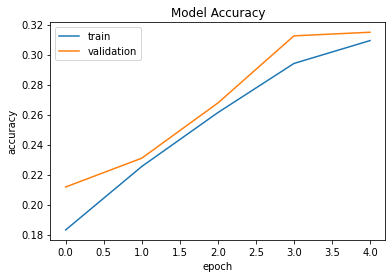

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper-left')

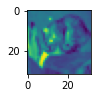

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


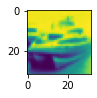

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


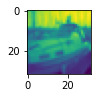

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


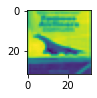

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


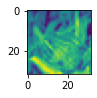

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


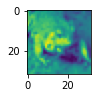

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


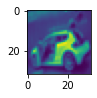

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


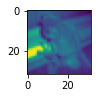

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


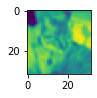

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
import numpy as np
y_pred = model.predict(x_test)
for i in range (9):
  plt.subplot(330+i+1)    # 330 mean: 3 hang 3 cot 
  plt.imshow(x[i])
  plt.show()
  print(np.round(y_pred[i]))